In [1]:
import numpy as np
import pandas as pd
import re
pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
df=pd.read_csv('https://tinyurl.com/2pfhncqw')

In [3]:
df.head()

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [5]:
df.shape[0]

309910

In [6]:
df.columns

Index(['Unnamed: 0', 'rarity_score', 'last_sale_date', 'last_sale_price',
       'total_supply', 'creation_date', 'verification_status', 'n_of_traits',
       'contract_type', 'seller_fees', 'platform_fees', 'openrarity_enabled',
       'has_website', 'has_own_twitter', 'has_discord', 'has_medium',
       'n_tweets_in_range', 'avg_likes', 'avg_replies', 'avg_retweets',
       'min_likes', 'min_replies', 'min_retweets', 'max_likes', 'max_replies',
       'max_retweets'],
      dtype='object')

In [16]:
df.pivot_table(index='verification_status',columns='contract_type',values=['rarity_score','last_sale_price'],aggfunc=['sum'])

sum                                           
                    last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [17]:
df=pd.read_csv('https://tinyurl.com/2r24n45l')

In [18]:
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [19]:
df.shape[0]

22000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [21]:
df.tail()

,Name,Year,Miles,Price
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990
21999,Honda Civic,2012,70676,14990


In [27]:
df['Brand']=df['Name'].str.split(' ').str.get(0)

In [28]:
df

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,Honda
21996,Dodge Charger,2016,62616,23990,Dodge
21997,Ford Taurus,2013,50345,16990,Ford
21998,Toyota Corolla Hatchback,2020,27945,23990,Toyota


In [31]:
int(re.findall(r'\d{4}',str('2015'))[0])

2015

In [33]:
df['Year']=df['Year'].apply(lambda x:int(re.findall(r'\d{4}',str(x))[0]))

In [39]:
pt=df.query('Year>=2018 and Year<=2022').pivot_table(index='Brand',columns='Year',values=['Miles','Price'],aggfunc={'Price':'mean','Miles':'median'})

In [44]:
pt.head()

Miles                                             Price  \
Year      2018     2019     2020     2021     2022          2018   
Brand                                                              
Acura  32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa   38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi   49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW    39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick  50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   

                                                          
Year           2019          2020          2021     2022  
Brand                                                     
Acura  34496.777778  37590.000000  43856.666667      NaN  
Alfa   30475.714286           NaN           NaN      NaN  
Audi   28590.000000  32490.000000  71990.000000  39590.0  
BMW    33280.909091  39811.083333  37062.727273  57030.0  
Buick  21033.632653  24141.947368  25796.842105  26940.0

<Axes: ylabel='Density'>

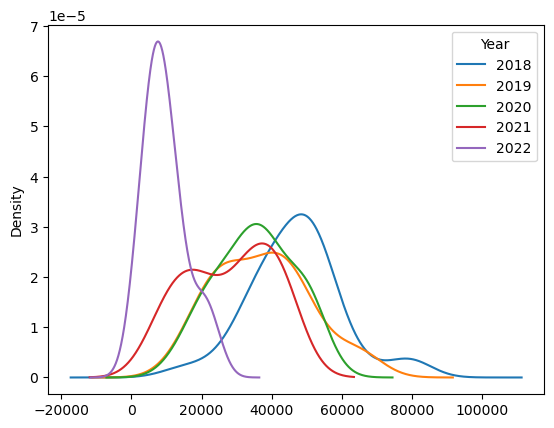

In [42]:
pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

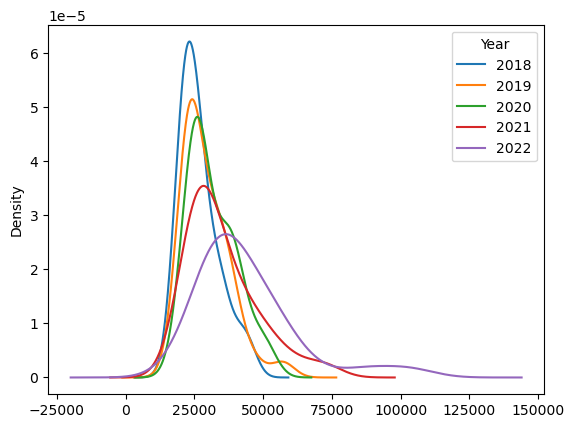

In [43]:
pt['Price'].plot(kind='kde')